# Create Map Charts with Python
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.com)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__

<br>Hi people, en este post enseñare a crear gráficos de mapas con python para poder analizar información con un enfoque geografico :D.

Para Python les recomiendo que usen __[winpython](https://winpython.github.io/)__ (solo windows, pero es portable)  o __[anaconda](https://www.anaconda.com/download/)__ (es multiplataforma, pero requiere de instalación). Al instalar cualquiera de estas distribuciones encontraran los ejecutables Jupyter Notebook (el formato del post, los archivos tienen extensión es .ipynb) y Spyder (IDE que recomiendo para trabajar porque permite visualizar las variables y su tipo, los archivos tienen extensión es .py)

En la página del blog dejaré los notebooks (se abren con jupyter notebook), los scripts de python (recomiendo que usen spyder para trabajar con estos archivos) y los archivos de excel y shapes con la data usada en los ejemplos.
<br>Los temas que trataremos en este post son:
1. Instalación de Geopandas.
1. Creación de Mapas con colores y leyendas.
    1. Creación de Mapa del Mundo.
    1. Creación de Mapa de un País.
    
## 1. Instalación de Geopandas.
<br>Para empezar debemos instalar Geopandas en nuestra distribución de Python, para poder instalarlo seguimos los siguientes pasos:
* Abrir el terminal de nuestra distribución de winpython, el archivo se llama "WinPython Command Prompt.exe".
* Instalar los paquetes de requerimientos escribiendo el siguiente comando en la terminal: __pip install fiona, shapefile, pyshp, six, pyproj, psycopg2, geopy, rtree, descartes, pysal, libgdal, gdal, geos__
* En caso exista error al instalar alguno de esos paquetes, lo recomendable es descargarlos de esta __[Página](https://www.lfd.uci.edu/~gohlke/pythonlibs/)__ 
* Los archivos descargados tendran la extensión .whl, para instalarlos escribir el siguiente comando en la terminal: __pip install "Ruta del Archivo\Nombre del Archivo.whl"__, o si estan en la misma carpeta del terminal usar el comando: __pip install "Nombre del Archivo.whl"__. Ambos comandos sin las comillas.
* Para descargar archivos de mapas de cualquier país pueden ir a las siguientes páginas __[gadm](https://gadm.org/download_country_v3.html)__ y __[diva-gis](http://www.diva-gis.org/gdata)__

## 2. Creación de Mapas con colores y leyendas.
### 1. Creación de Mapa del Mundo.
Para ver las propiedades de los gráficos de geopandas pueden consultar en la pagina de geopandas y en la de matplotlib.

In [1]:
%matplotlib inline

# Utilizando la base de datos de prueba que viene con geopandas
import geopandas as gpd
import matplotlib.pyplot as plt

df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Mostrando la data cargada
display(df[0:10])

C:\Users\HP\AppData\Local\Temp\ipykernel_20776\1784948422.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


<Axes: >

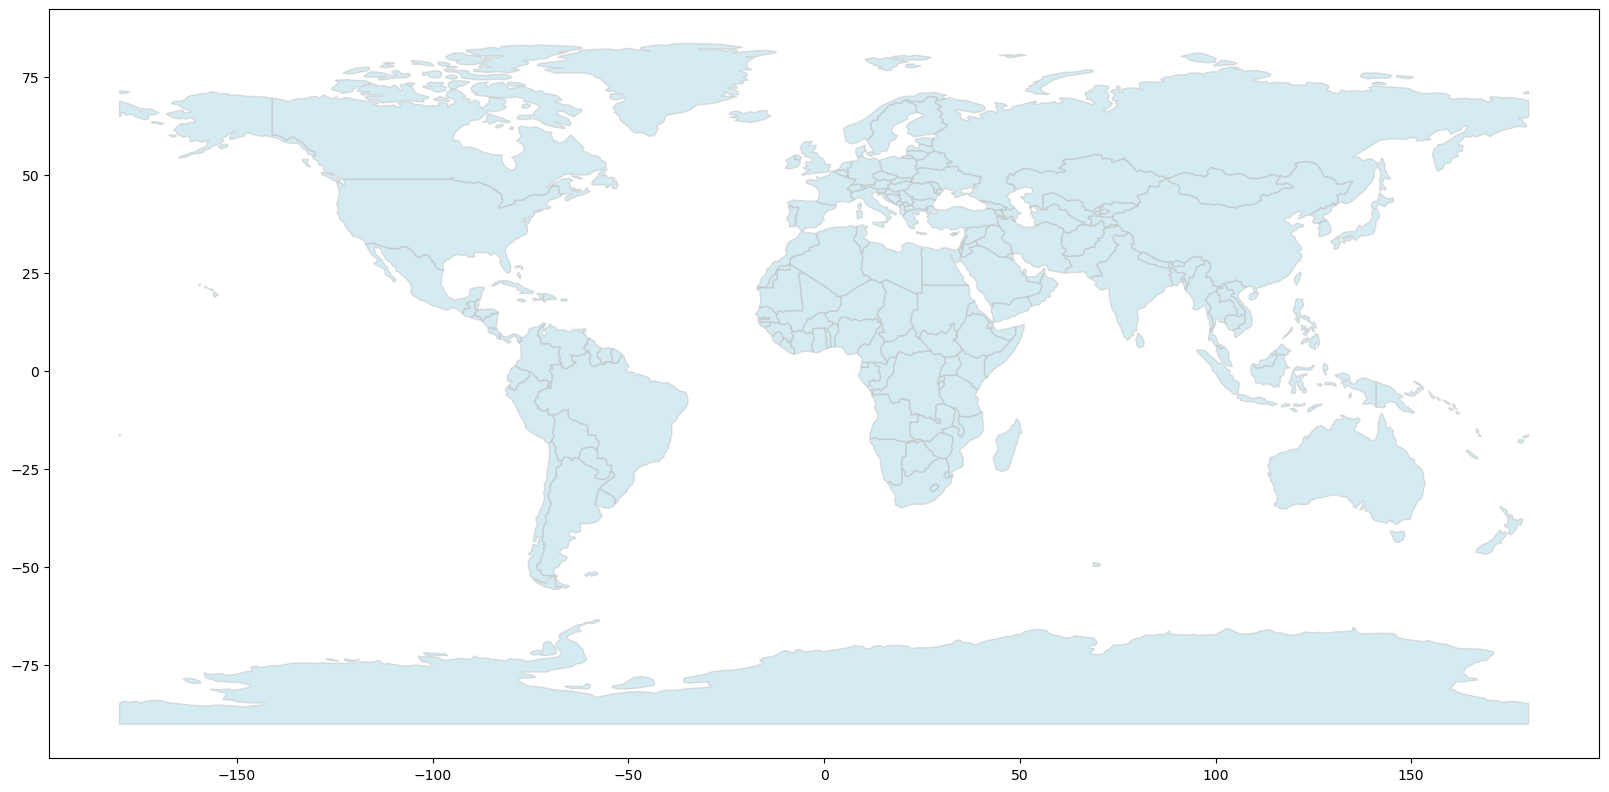

In [2]:
# Graficando el mapa
df.plot(figsize=(20, 25), alpha=0.5, edgecolor='silver', color = 'lightblue')

In [3]:
import geopandas as gpd
import plotly.express as px

# Carga el GeoDataFrame
df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Crea la figura del mapa utilizando Plotly Express
fig = px.choropleth(df,
                    geojson=df.geometry,
                    locations=df.index,
                    color='pop_est',  # Columna para el color
                    hover_name='name',  # Columna para el tooltip
                    projection='mercator'  # Proyección del mapa
                    )

# Actualiza el diseño de la figura
fig.update_geos(fitbounds="locations", visible=False)

# Muestra el mapa interactivo
fig.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_20776\3453975763.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [4]:
import geopandas as gpd
import plotly.express as px

fig = px.choropleth(df, 
                    geojson=df.geometry, 
                    locations=df.index, 
                    color='pop_est',
                    hover_name='name',
                    projection='natural earth')

fig.update_geos(showcoastlines=True, coastlinecolor="Silver", showland=True, landcolor="lightblue")
fig.show()


In [5]:
# Eliminando a la antartida
df = df[(df['iso_a3'] != 'ATA') & (df['iso_a3'] != 'ATF')]
display(df[0:10])

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


<Axes: >

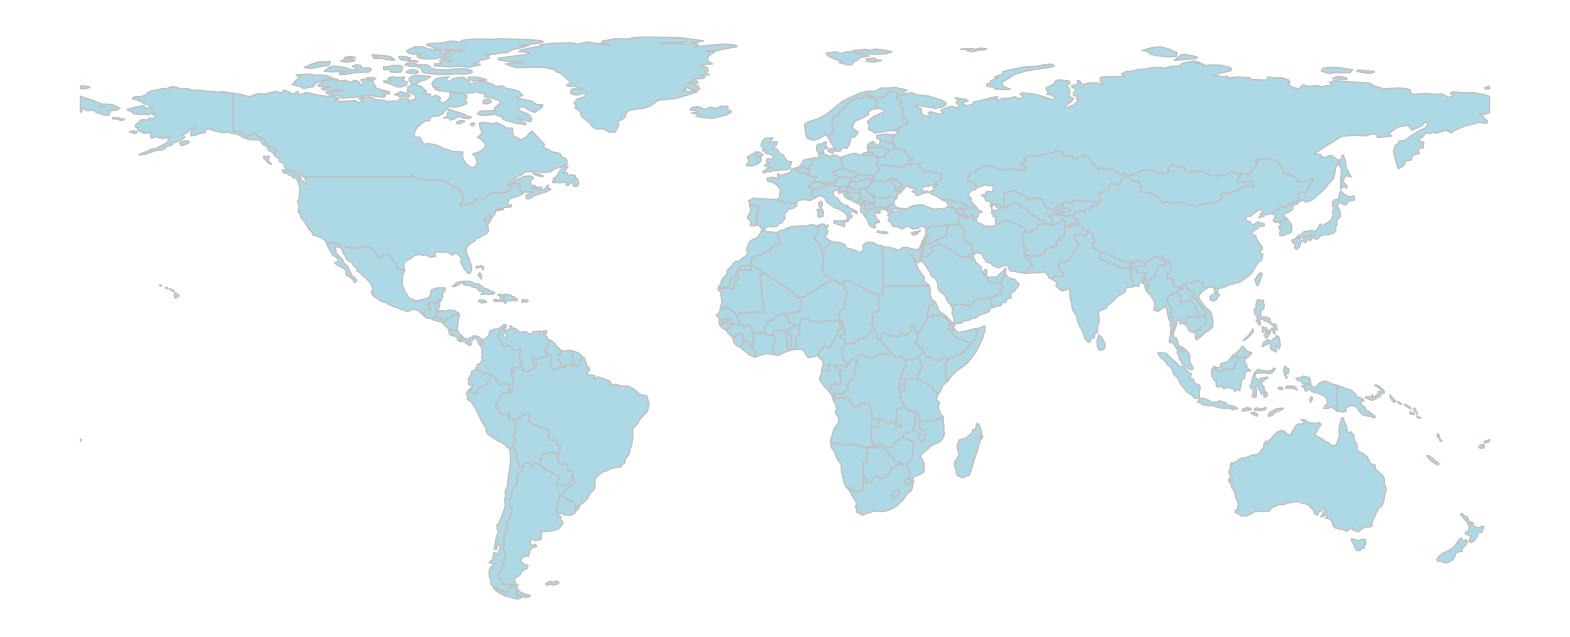

In [6]:
# Creando la figura y los ejes para poder editarlos con matplotlib
fig, ax = plt.subplots(figsize=(20,25), subplot_kw={'aspect':'equal'})
# Eliminando los bordes del cuadro
ax.axis('off')

df.plot(edgecolor = 'silver', color = 'lightblue', ax = ax)

### 2. Creación de Mapa de un País.
Luego de descargar la data de un país y descomprimirlo en la misma carpeta del notebook o script, usamos el siguiente código:

In [7]:
import geopandas as gpd

# Cargando la informacion de la carpeta de la data descargada
df = gpd.read_file("Limite_departamental")

display(df)

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3.930647e+06,"POLYGON ((212372.284 9332652.146, 212473.276 9..."
1,ANCASH,166,02,3.596225e+06,"POLYGON ((150666.941 9058816.782, 150667.214 9..."
2,APURIMAC,80,03,2.111415e+06,"POLYGON ((781311.035 8490376.526, 781314.444 8..."
3,AREQUIPA,109,04,6.325589e+06,"POLYGON ((518459.305 8278798.442, 518429.805 8..."
4,AYACUCHO,111,05,4.350382e+06,"POLYGON ((571155.261 8654149.131, 571057.668 8..."
5,CAJAMARCA,127,06,3.304466e+06,"POLYGON ((25179.070 9209709.788, 25130.784 920..."
6,CALLAO,6,07,1.414095e+04,"POLYGON ((265262.111 8665012.021, 265257.362 8..."
7,CUSCO,108,08,7.207614e+06,"POLYGON ((875377.090 8338199.014, 875434.571 8..."
8,HUANCAVELICA,94,09,2.206504e+06,"POLYGON ((577364.103 8587853.003, 577430.134 8..."
9,HUANUCO,76,10,3.720053e+06,"POLYGON ((290289.525 8963832.641, 290399.011 8..."


Podremos observar que el archivo tiene 5 columnas, ahora vamos a añadir una columna de acuerdo al indice (la columna sin titulo del 0 al 24), para crear un mapa con colores de acuerdo a los valores de la nueva columna.

In [8]:
import pandas as pd
import numpy as np

# Creando un valor con la variable a graficar
a = np.random.uniform(0, 25, 25)
df1 = gpd.GeoDataFrame(a, columns = ['Valor'])

# Uniendo la nueva variable a la data del mapa
df = pd.concat([df, df1] , axis=1)

# Mostrando la nueva tabla
display(df)

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,Valor
0,AMAZONAS,84,01,3.930647e+06,"POLYGON ((212372.284 9332652.146, 212473.276 9...",4.532959
1,ANCASH,166,02,3.596225e+06,"POLYGON ((150666.941 9058816.782, 150667.214 9...",10.264585
2,APURIMAC,80,03,2.111415e+06,"POLYGON ((781311.035 8490376.526, 781314.444 8...",12.340812
3,AREQUIPA,109,04,6.325589e+06,"POLYGON ((518459.305 8278798.442, 518429.805 8...",21.034152
4,AYACUCHO,111,05,4.350382e+06,"POLYGON ((571155.261 8654149.131, 571057.668 8...",7.304724
5,CAJAMARCA,127,06,3.304466e+06,"POLYGON ((25179.070 9209709.788, 25130.784 920...",6.010958
6,CALLAO,6,07,1.414095e+04,"POLYGON ((265262.111 8665012.021, 265257.362 8...",20.726816
7,CUSCO,108,08,7.207614e+06,"POLYGON ((875377.090 8338199.014, 875434.571 8...",23.584333
8,HUANCAVELICA,94,09,2.206504e+06,"POLYGON ((577364.103 8587853.003, 577430.134 8...",14.378176
9,HUANUCO,76,10,3.720053e+06,"POLYGON ((290289.525 8963832.641, 290399.011 8...",18.489005


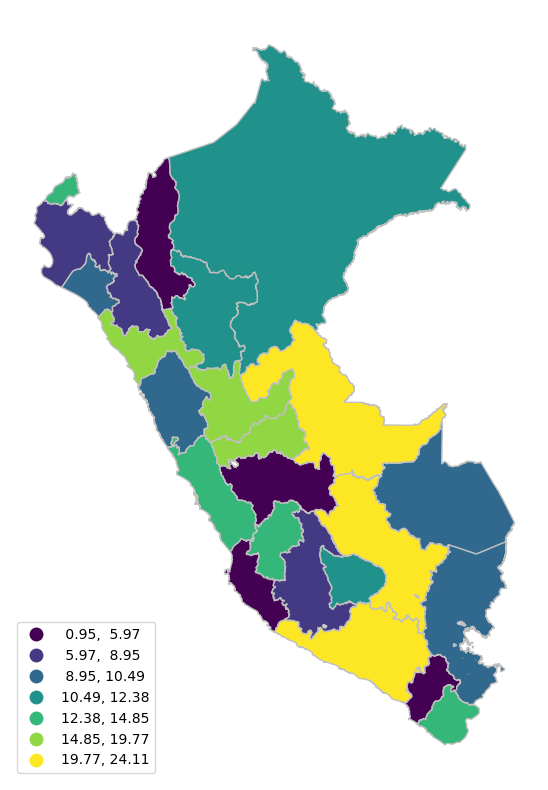

In [9]:
# Creando la figura y los ejes
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})

# Eliminando los bordes del cuadro
ax.axis('off')

# Graficando los valores
a = df.plot(column='Valor', #Data del color del mapa
            scheme='Quantiles', #Como se calculara la leyenda
            k=7, #Numero de los intervalos de la leyenda
            cmap='viridis', #Color del mapa
            legend = True, #si se habilita la leyenda
            edgecolor = 'silver', #color bordes
            ax = ax, #formato de los ejes
            legend_kwds = {'loc':'lower left', 'fontsize' : 'medium'}) #formato de la leyenda

# Grabando la figura en formato jpg
fig.savefig("Peru_Departamentos.jpg", edgecolor='k', dpi=300)

Ahora vamos a crear el mapa por distritos

In [10]:
# Cargando la informacion de la carpeta de la data descargada
df = gpd.read_file("Limite_distrital")

# Averiguamos cuantos distritos hay en el archivo de Perú
print(len(df))

1834


In [11]:
# Creando un valor con la variable a graficar por distrito
a = np.random.uniform(0, 1834, 1834)
df1 = gpd.GeoDataFrame(a, columns = ['Valor'])

# Uniendo la nueva variable a la data del mapa
df = pd.concat([df, df1] , axis=1)

# Mostrando la nueva tabla
display(df)

,OBJECTID,IDDIST,IDDPTO,IDPROV,NOMBDIST,NOMBPROV,NOMBDEP,DCTO,LEY,FECHA,NOM_CAP,SHAPE_LENG,SHAPE_AREA,SHAPE_LE_1,SHAPE_AR_1,AREA_MINAM,geometry,Valor
0,1,230110,23,2301,CORONEL GREGORIO ALBARRACIN LANCHIPA,TACNA,TACNA,LEY,27415,02/02/2001,ALFONSO UGARTE,0.570510,0.016140,0.570195,0.015990,18834.14,"POLYGON ((1014289.567 7992735.763, 1014282.146...",735.773184
1,2,230108,23,2301,POCOLLAY,TACNA,TACNA,LEY,13069,15/01/1959,POCOLLAY,0.883871,0.022816,0.897169,0.022961,27073.52,"POLYGON ((1040112.262 8007010.371, 1039963.302...",1593.684572
2,3,230103,23,2301,CALANA,TACNA,TACNA,LEY,S/N,20/08/1872,CALANA,0.446736,0.009458,0.445963,0.009383,11063.99,"POLYGON ((1020148.559 8005109.635, 1019927.551...",414.241957
3,4,230101,23,2301,TACNA,TACNA,TACNA,-,-,EPOCA INDEP.,TACNA,2.758951,0.209156,2.758123,0.209177,246365.27,"POLYGON ((1004931.516 8004168.994, 1005030.078...",1298.251103
4,5,230109,23,2301,SAMA,TACNA,TACNA,-,-,EPOCA INDEP.,LAS YARAS,1.515506,0.096789,1.513660,0.096766,113953.51,"POLYGON ((985122.355 8016071.866, 985176.222 8...",1677.177223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,1830,160303,16,1603,TIGRE,LORETO,LORETO,LEY,9815,02/07/1943,INTUTU,9.211057,1.637168,9.179725,1.637432,2011378.30,"POLYGON ((503874.818 9738523.018, 504363.715 9...",339.860584
1830,1831,160107,16,1601,NAPO,MAYNAS,LORETO,LEY,9815,02/07/1943,SANTA CLOTILDE,11.380550,1.986357,11.359436,1.985362,2440805.01,"POLYGON ((729229.887 9685991.762, 727609.175 9...",1486.810427
1831,1832,160109,16,1601,PUTUMAYO,MAYNAS,LORETO,LEY,9815,02/07/1943,SAN ANTONIO DEL ESTRECHO,16.256407,2.884865,16.232424,2.884722,3555516.31,"POLYGON ((663455.849 9838801.709, 663522.041 9...",88.911133
1832,1833,160110,16,1601,TORRES CAUSANA,MAYNAS,LORETO,LEY,9815,02/07/1943,PANTOJA,6.592491,0.609698,6.572157,0.609290,749185.08,"POLYGON ((514052.636 9894982.718, 513481.548 9...",1127.691014


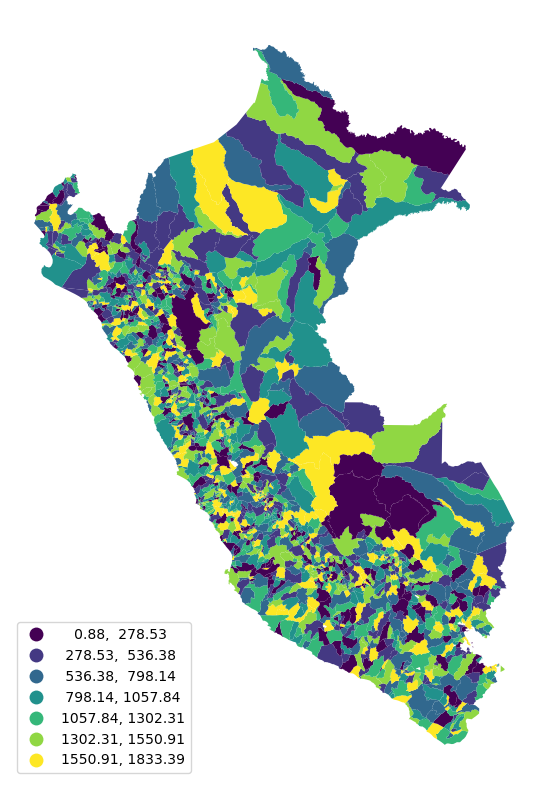

In [14]:
# Creando la figura y los ejes
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})

# Eliminando los bordes del cuadro
ax.axis('off')

# Graficando los valores
a = df.plot(column='Valor', #Data del color del mapa
            scheme='Quantiles', #Como se calculara la leyenda
            k=7, #Numero de los intervalos de la leyenda
            cmap='viridis', #Color del mapa
            legend = True, #si se habilita la leyenda
            edgecolor = None, #color bordes 
            ax = ax, #formato de los ejes
            legend_kwds = {'loc':'lower left', 'fontsize' : 'medium'}) #formato de la leyenda

#Grabando la figura en formato jpg
fig.savefig("Peru_Distritos.jpg", edgecolor='k', dpi = 300 )

Espero les haya gustado este tutorial y que les sirva para hacer presentaciones de alto impacto.